# Correlation analysis between signal data and wear

In this notebook, a correlation analysis is conducted between the c6 dataset and its wear data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns
import os
%matplotlib inline


In [2]:
# Silences pandas warning that ruin the display of the notebook on github
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

## Calculate basic statistics for the c6 data set

First, statistical calculations are made on each file of the dataset. The results of those are saved to a separate file, which then is used for the correlation analysis.
The calculated statisitcs:
- minimum
- maximum
- mean
- standard deviation
- skewness
- kurtosis
- energy
- zero crossings

In [3]:
def calculate_zero_crossings(signal):
    return ((np.diff(np.sign(signal)) != 0).sum())

In [4]:
def calculate_energy(signal):
    return np.sum(signal ** 2)

In [5]:
def calculate_statistics (file_path):
    df = pd.read_csv(file_path,sep=',')
    df.columns = ['Force_X', 'Force_Y', 'Force_Z', 'Vibration_X', 'Vibration_Y', 'Vibration_Z', 'AE_RMS']
    stats = pd.DataFrame()
    for column in df.columns:
        col_data = df[column]
        stats[column + "_min"] = [col_data.min()]
        stats[column + "_max"] = [col_data.max()]
        stats[column + "_mean"] = [col_data.mean()]
        stats[column + "_std"] = [col_data.std()]
        stats[column + "_skew"] = [skew(col_data)]
        stats[column + "_kurtosis"] = [kurtosis(col_data)]
        stats[column + "_energy"] = [calculate_energy(col_data)]
        stats[column + "_zero_crossings"] = [calculate_zero_crossings(col_data)]
    
    return stats 

In [6]:
folder_path = '../notebooks/data/raw/c6/c6/'

stats_list = []

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path) and filename.endswith('.csv'):
        stats_list.append(calculate_statistics(file_path))

c6_stats = pd.concat(stats_list, ignore_index=True)

In [7]:
c6_stats.head()

,Force_X_min,Force_X_max,Force_X_mean,Force_X_std,Force_X_skew,Force_X_kurtosis,Force_X_energy,Force_X_zero_crossings,Force_Y_min,Force_Y_max,...,Vibration_Z_energy,Vibration_Z_zero_crossings,AE_RMS_min,AE_RMS_max,AE_RMS_mean,AE_RMS_std,AE_RMS_skew,AE_RMS_kurtosis,AE_RMS_energy,AE_RMS_zero_crossings
0,-2.307,3.658,0.574220,0.840820,-0.032997,-0.382231,1.993725e+05,4465,-10.467,5.915,...,899.042956,84221,-0.005,0.022,0.002320,0.004033,0.911094,0.770728,4.162967,6080
1,-3.449,7.369,1.611215,1.401475,0.198647,-0.122230,9.925229e+05,6200,-6.985,12.901,...,1579.953230,89948,-0.005,0.128,0.054203,0.015408,0.957703,2.997748,691.129729,24
2,-3.935,9.726,2.478937,1.944625,0.267432,-0.364239,2.168523e+06,5535,-8.690,19.025,...,2338.035406,81505,-0.005,0.210,0.083659,0.022583,1.341412,4.580245,1640.322552,20
3,-4.646,10.755,2.872566,2.267765,0.298827,-0.486769,2.930058e+06,4948,-9.251,21.510,...,2876.006214,81829,-0.005,0.220,0.100170,0.026010,1.291155,3.991472,2342.947085,20
4,-3.336,11.007,2.900341,2.244215,0.342342,-0.499587,2.952071e+06,5054,-19.283,22.179,...,3484.935887,82373,-0.005,0.253,0.108813,0.030731,1.481277,4.349041,2806.382361,68


#### Test for missing data:

In [8]:
c6_stats.isnull().sum().sum

<bound method Series.sum of Force_X_min                   0
Force_X_max                   0
Force_X_mean                  0
Force_X_std                   0
Force_X_skew                  0
Force_X_kurtosis              0
Force_X_energy                0
Force_X_zero_crossings        0
Force_Y_min                   0
Force_Y_max                   0
Force_Y_mean                  0
Force_Y_std                   0
Force_Y_skew                  0
Force_Y_kurtosis              0
Force_Y_energy                0
Force_Y_zero_crossings        0
Force_Z_min                   0
Force_Z_max                   0
Force_Z_mean                  0
Force_Z_std                   0
Force_Z_skew                  0
Force_Z_kurtosis              0
Force_Z_energy                0
Force_Z_zero_crossings        0
Vibration_X_min               0
Vibration_X_max               0
Vibration_X_mean              0
Vibration_X_std               0
Vibration_X_skew              0
Vibration_X_kurtosis          0
Vibration_X_

The created dataset has no null or missing values. As the original data was clean as well, this proves, that the calculations concluded without error.

#### Create a correlation matrix between each stats

In [9]:
c6_corr_matrix = c6_stats.corr()

In [10]:
c6_corr_matrix.head()

,Force_X_min,Force_X_max,Force_X_mean,Force_X_std,Force_X_skew,Force_X_kurtosis,Force_X_energy,Force_X_zero_crossings,Force_Y_min,Force_Y_max,...,Vibration_Z_energy,Vibration_Z_zero_crossings,AE_RMS_min,AE_RMS_max,AE_RMS_mean,AE_RMS_std,AE_RMS_skew,AE_RMS_kurtosis,AE_RMS_energy,AE_RMS_zero_crossings
Force_X_min,1.000000,-0.995416,-0.963585,-0.999096,0.334520,0.554599,-0.982426,-0.684838,0.961739,-0.924222,...,-0.988787,0.836589,0.026470,-0.640349,-0.596390,-0.498518,0.138123,-0.488446,-0.558975,0.060362
Force_X_max,-0.995416,1.000000,0.982203,0.997980,-0.329204,-0.585652,0.966942,0.723352,-0.957572,0.942924,...,0.975143,-0.807298,-0.019738,0.624711,0.578219,0.483431,-0.119433,0.494870,0.536800,-0.076250
Force_X_mean,-0.963585,0.982203,1.000000,0.971246,-0.388951,-0.669914,0.914677,0.768609,-0.930878,0.968163,...,0.925573,-0.717813,0.000574,0.569473,0.507528,0.441985,-0.041405,0.510616,0.460363,-0.110847
Force_X_std,-0.999096,0.997980,0.971246,1.000000,-0.335422,-0.565518,0.979307,0.696437,-0.961712,0.930903,...,0.985361,-0.829029,-0.025740,0.635094,0.592189,0.490756,-0.134589,0.492463,0.554239,-0.064745
Force_X_skew,0.334520,-0.329204,-0.388951,-0.335422,1.000000,0.722345,-0.324637,-0.266835,0.376839,-0.387413,...,-0.324728,0.036586,-0.007291,-0.116310,-0.052329,-0.135159,-0.182001,-0.223304,-0.105768,-0.109936


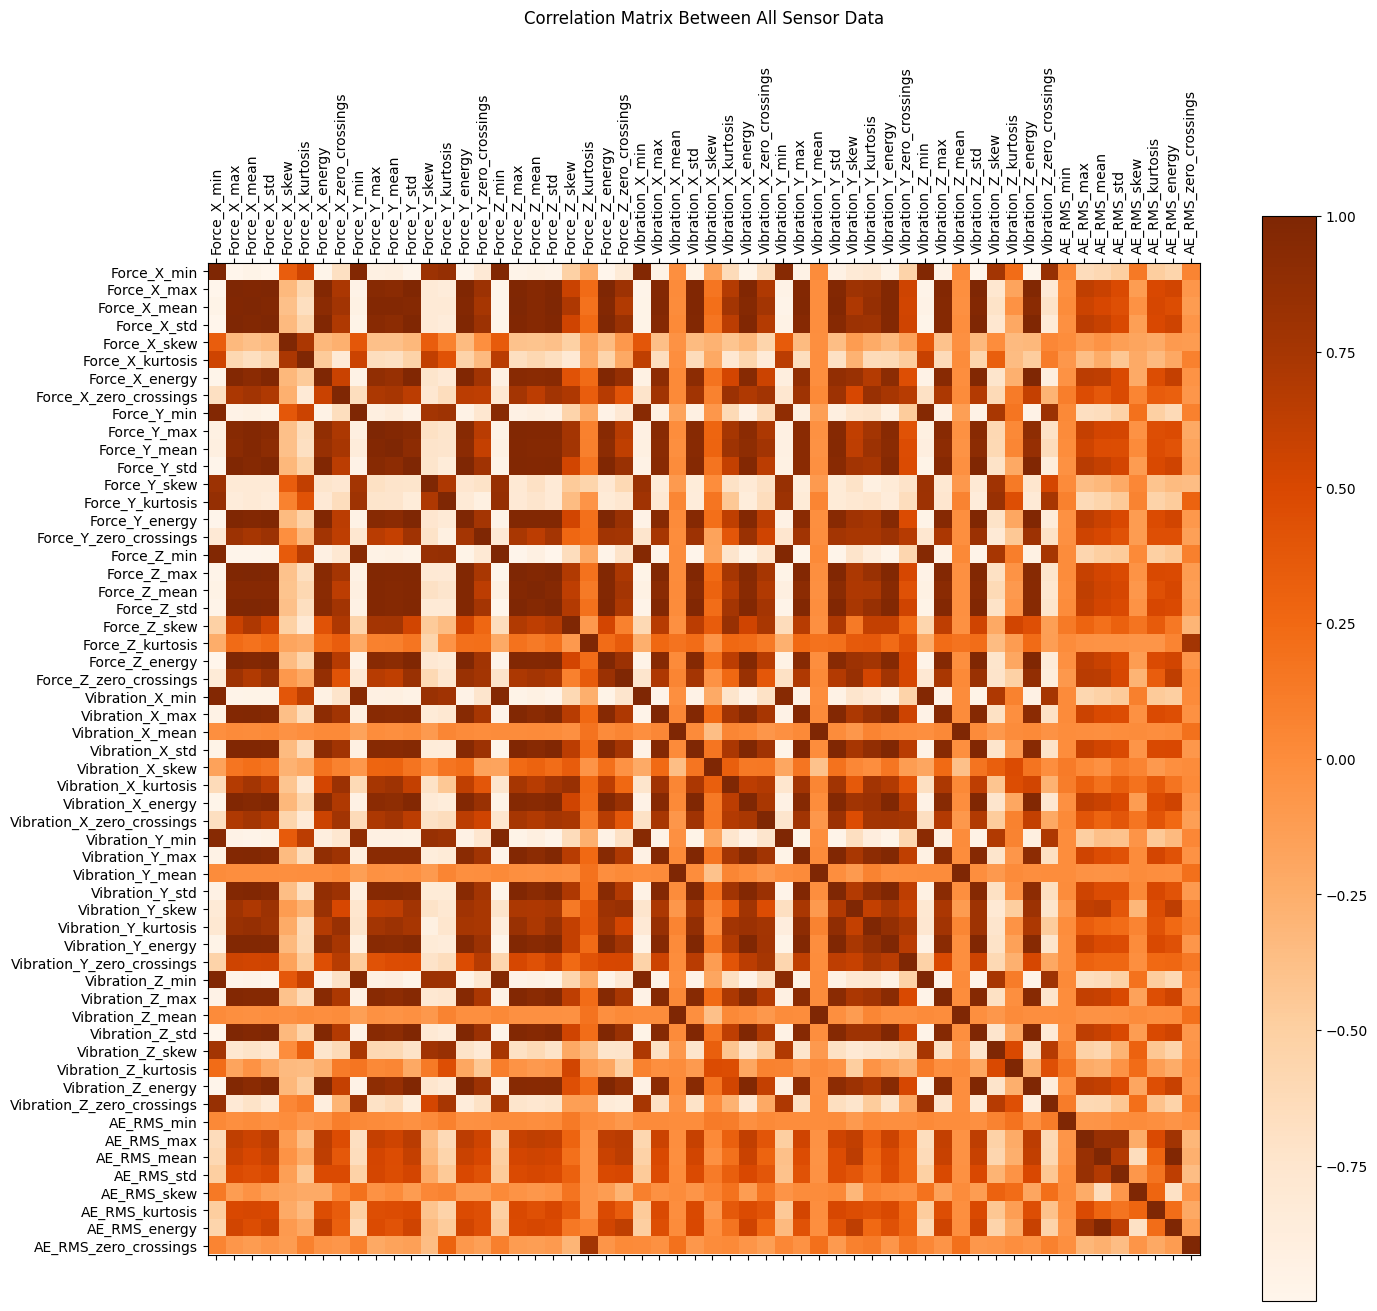

In [11]:
plt.figure(figsize=(16,14))
plt.matshow(c6_corr_matrix, fignum=1, cmap='Oranges')
plt.colorbar()
plt.xticks(range(len(c6_corr_matrix.columns)), c6_corr_matrix.columns, rotation=90)
plt.yticks(range(len(c6_corr_matrix.columns)), c6_corr_matrix.columns)
plt.title('Correlation Matrix Between All Sensor Data', pad=30)
plt.show()


## Load wear data

In [12]:
c6_wear_data = pd.read_csv('../notebooks/data/raw/c6/c6_wear.csv', sep=',')

In [13]:
c6_wear_data.head()

,cut,flute_1,flute_2,flute_3
0,1,62.788648,9.896641,14.620908
1,2,64.136043,19.793281,29.241817
2,3,65.365273,29.689922,43.862725
3,4,66.486880,39.586563,58.483634
4,5,67.510808,43.019994,59.345759


In [14]:
c6_wear_data = c6_wear_data.drop(columns=['cut'])

## Correlations between calculated statistics and wear data

In [15]:
c6_combined_data = pd.concat([c6_stats, c6_wear_data], axis=1)
c6_combined_corr_matrix = c6_combined_data.corr()

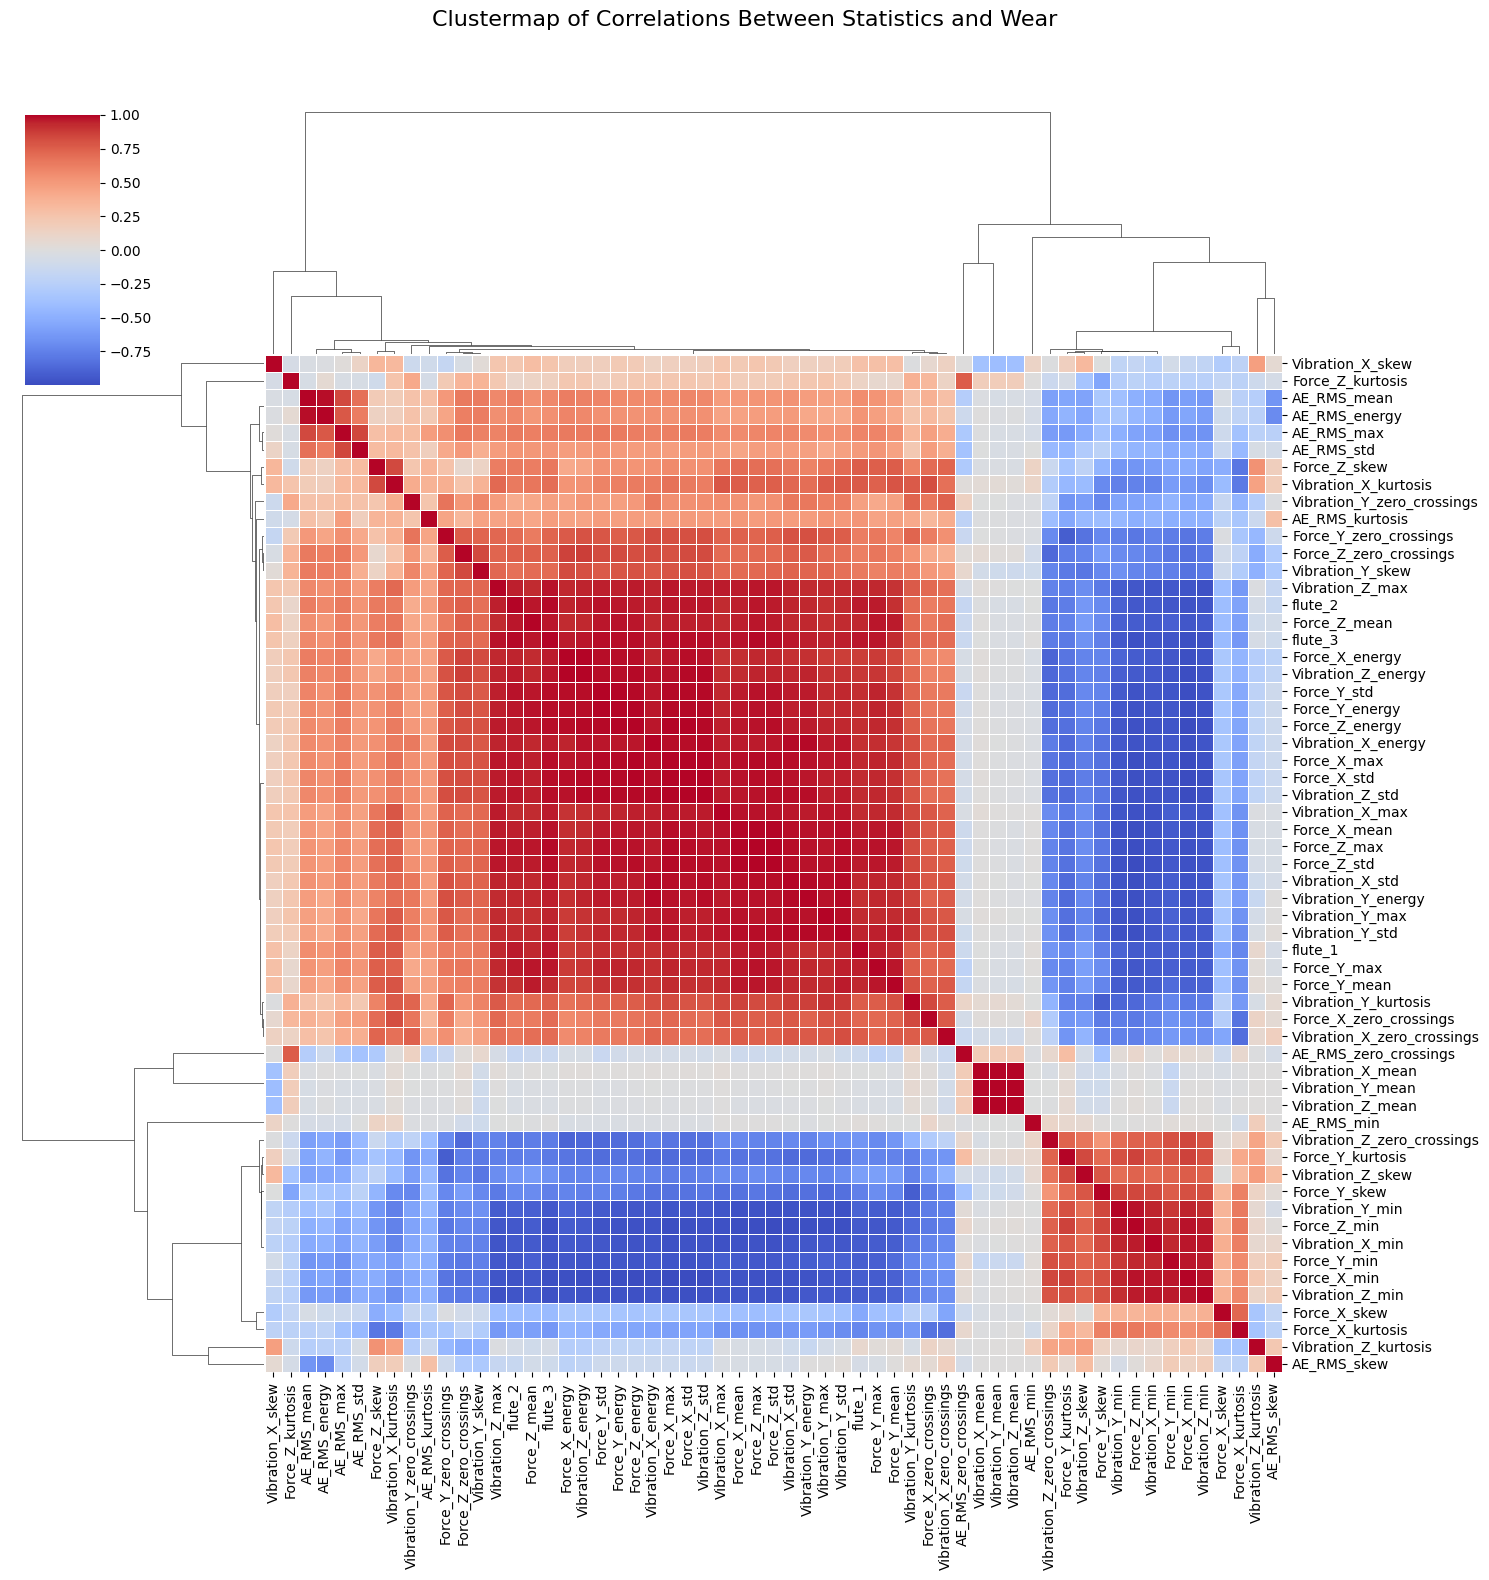

In [16]:
clustermap = sns.clustermap(c6_combined_corr_matrix, metric='correlation', method='average', cmap='coolwarm', linewidths=0.5, figsize=(15, 15))
clustermap.figure.suptitle('Clustermap of Correlations Between Statistics and Wear', y=1.05, fontsize=16)
plt.show()

This cluster matrix (and the below displayed table) shows similarly uneven wear among the flutes, but - unlike in case of the c1 data - at the c6 dataset, flute 1 has weaker correlations, overall. Again, Force and Vibration data correlates the most, but the hierarchy of each signal type is less clear. 

In [17]:
c6_wear_corr_matrix = c6_combined_corr_matrix[['flute_1', 'flute_2', 'flute_3']].drop(['flute_1', 'flute_2', 'flute_3'], axis=0)

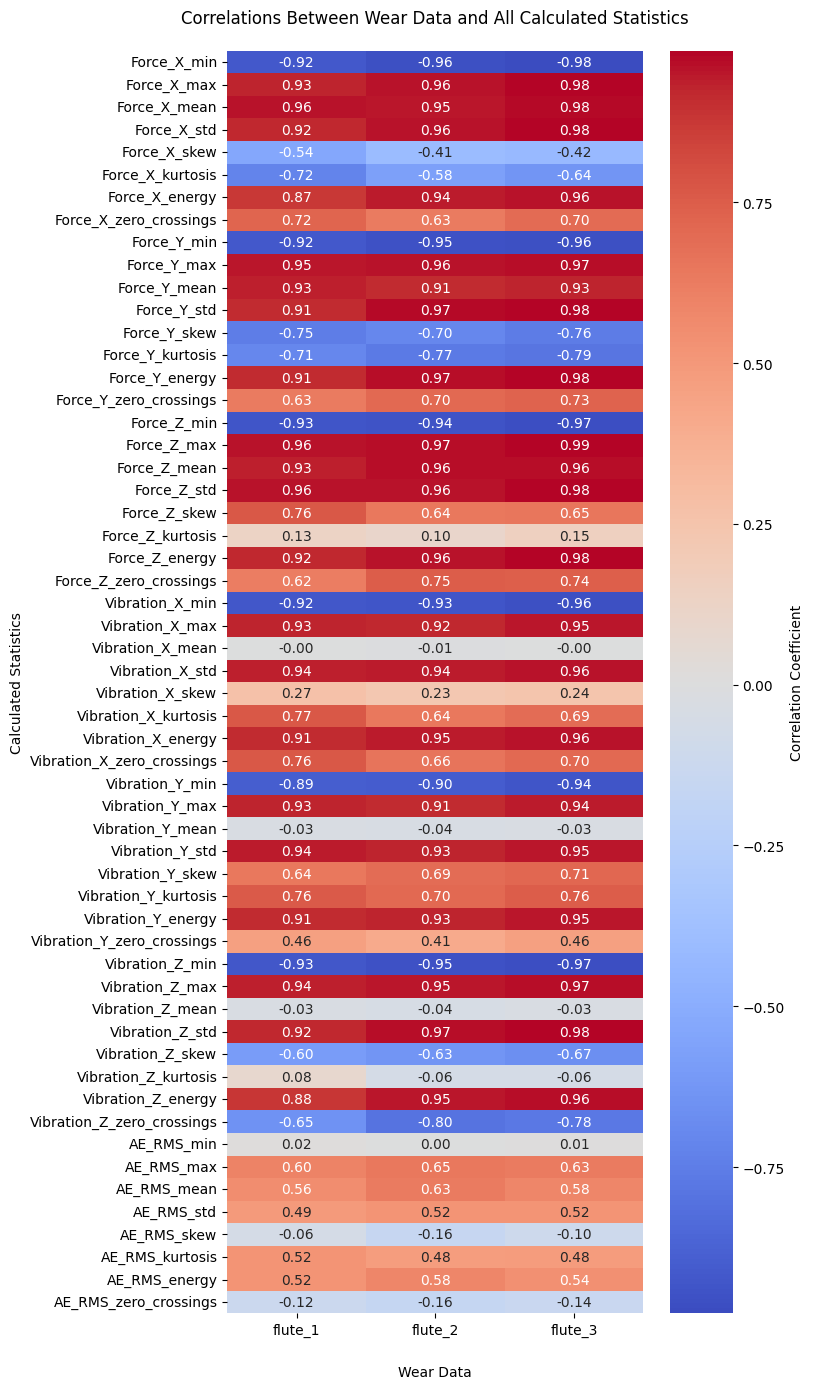

In [18]:

plt.figure(figsize=(8, 14))
sns.heatmap(c6_wear_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            annot_kws={"size": 10},
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlations Between Wear Data and All Calculated Statistics', pad=20)
plt.ylabel('Calculated Statistics')
plt.xlabel('Wear Data', labelpad=20)
plt.tight_layout()
plt.show()


All three force metrics (X, Y, and Z) demonstrate strong positive correlations across all flutes, particularly for maximum and mean values. Similar to the force metrics, the vibration metrics also show strong positive correlations, especially for maximum values. The minimum values for force and vibration metrics are negative across all flutes, suggesting that there are instances where these metrics dip significantly. This might indicate moments of tool engagement or disengagement. The energy values for both force and vibration metrics suggest robust engagement with the cutting material. The standard deviations indicate stable cutting conditions. The skewness values for the force metrics are negative, suggesting that the majority of readings are skewed towards the higher end. This is consistent with a stable cutting process.
The high correlations among the force and vibration metrics across the three flutes suggest consistent cutting conditions and machine setup. While the over-all cutting process seems to be stable, the presence of negative skewness and kurtosis in the force metrics suggests potential areas for monitoring and improvement.

In [19]:
min_columns = [
    'Force_X_min', 
    'Force_Y_min', 
    'Force_Z_min', 
    'Vibration_X_min', 
    'Vibration_Y_min', 
    'Vibration_Z_min', 
    'AE_RMS_min'
]
min_stats = c6_stats[min_columns]
combined_data_min = pd.concat([min_stats.reset_index(drop=True), c6_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_min = combined_data_min.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
min_correlation_matrix = corr_matrix_min.loc[min_columns, wear_columns]


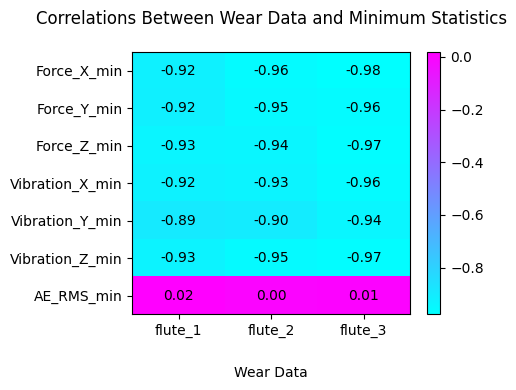

In [20]:
plt.figure(figsize=(5, 4))
plt.title('Correlations Between Wear Data and Minimum Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(min_correlation_matrix, cmap='cool', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(min_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(min_columns)), min_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()


In [21]:
max_columns = [
    'Force_X_max', 
    'Force_Y_max', 
    'Force_Z_max', 
    'Vibration_X_max', 
    'Vibration_Y_max', 
    'Vibration_Z_max', 
    'AE_RMS_max'
]
max_stats = c6_stats[max_columns]
combined_data_max = pd.concat([max_stats.reset_index(drop=True), c6_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_max = combined_data_max.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
max_correlation_matrix = corr_matrix_max.loc[max_columns, wear_columns]


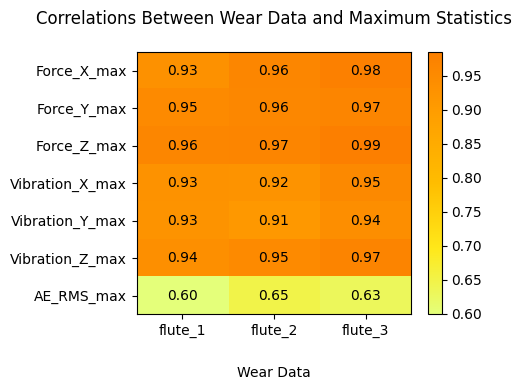

In [22]:
plt.figure(figsize=(5, 4))
plt.title('Correlations Between Wear Data and Maximum Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(max_correlation_matrix, cmap='Wistia', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(max_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(max_columns)), max_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

All three force metrics (Force_X_max, Force_Y_max, Force_Z_max) exhibit very high positive correlations, especially Force_Z_max, which shows the highest correlation across all flutes. This suggests that the maximum forces are consistently high during cutting. The vibration metrics also display strong positive correlations. Vibration_Z_max has the highest correlation among the vibration metrics across flutes, reinforcing the notion that vibration behavior is closely tied to force applications during cutting. The AE_RMS_max values show moderate correlations with the force and vibration metrics.

In [23]:
mean_columns = [
    'Force_X_mean', 
    'Force_Y_mean', 
    'Force_Z_mean', 
    'Vibration_X_mean', 
    'Vibration_Y_mean', 
    'Vibration_Z_mean', 
    'AE_RMS_mean'
]
mean_stats = c6_stats[mean_columns]
combined_data_mean = pd.concat([mean_stats.reset_index(drop=True), c6_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_mean = combined_data_mean.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
mean_correlation_matrix = corr_matrix_mean.loc[mean_columns, wear_columns]


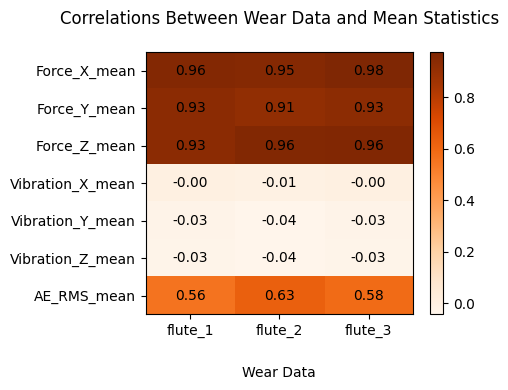

In [24]:
plt.figure(figsize=(5, 4))
plt.title('Correlations Between Wear Data and Mean Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(mean_correlation_matrix, cmap='Oranges', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(mean_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(mean_columns)), mean_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

The strong correlations among the force metrics suggest that the cutting process is stable and well-controlled, resulting in consistent average force application. This consistency is crucial for optimizing cutting performance and tool longevity. The low correlation coefficients for the vibration metrics indicate that vibrations may not significantly affect the cutting process. The moderate correlation of AE_RMS_mean with force metrics suggests that while acoustic emissions can provide useful information about the cutting process, they should be considered alongside force measurements.

In [25]:
std_columns = [
    'Force_X_std', 
    'Force_Y_std', 
    'Force_Z_std', 
    'Vibration_X_std', 
    'Vibration_Y_std', 
    'Vibration_Z_std', 
    'AE_RMS_std'
]
std_stats = c6_stats[std_columns]
combined_data_std = pd.concat([std_stats.reset_index(drop=True), c6_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_std = combined_data_std.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
std_correlation_matrix = corr_matrix_std.loc[std_columns, wear_columns]


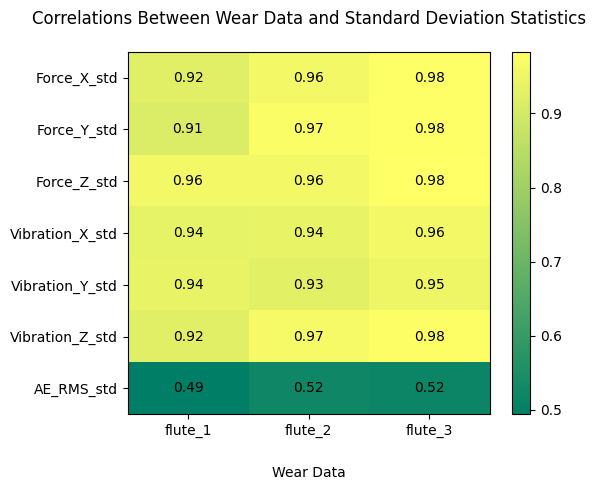

In [26]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Standard Deviation Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(std_correlation_matrix, cmap='summer', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(std_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(std_columns)), std_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

In [27]:
skew_columns = [
    'Force_X_skew', 
    'Force_Y_skew', 
    'Force_Z_skew', 
    'Vibration_X_skew', 
    'Vibration_Y_skew', 
    'Vibration_Z_skew', 
    'AE_RMS_skew'
]
skew_stats = c6_stats[skew_columns]
combined_data_skew = pd.concat([skew_stats.reset_index(drop=True), c6_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_skew = combined_data_skew.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
skew_correlation_matrix = corr_matrix_skew.loc[skew_columns, wear_columns]


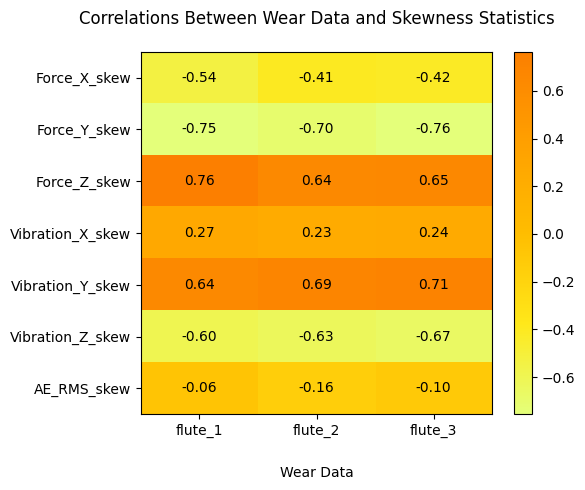

In [28]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Skewness Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(skew_correlation_matrix, cmap='Wistia', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(skew_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(skew_columns)), skew_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

The negative skewness in the force metrics implies a controlled cutting process, where the majority of force measurements are consistently high. However, the presence of lower outliers warrants monitoring. The positive skewness in Vibration_Y and Vibration_X indicates a tendency towards higher vibration levels, which could correlate with operational conditions or tool wear. The near-normal distribution of AE_RMS suggests that the acoustic emissions during cutting are consistent, providing a reliable metric for assessing tool performance.

In [29]:
kurtosis_columns = [
    'Force_X_kurtosis', 
    'Force_Y_kurtosis', 
    'Force_Z_kurtosis', 
    'Vibration_X_kurtosis', 
    'Vibration_Y_kurtosis', 
    'Vibration_Z_kurtosis', 
    'AE_RMS_kurtosis'
]
kurtosis_stats = c6_stats[kurtosis_columns]
combined_data_kurtosis = pd.concat([kurtosis_stats.reset_index(drop=True), c6_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_kurtosis = combined_data_kurtosis.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
kurtosis_correlation_matrix = corr_matrix_kurtosis.loc[kurtosis_columns, wear_columns]


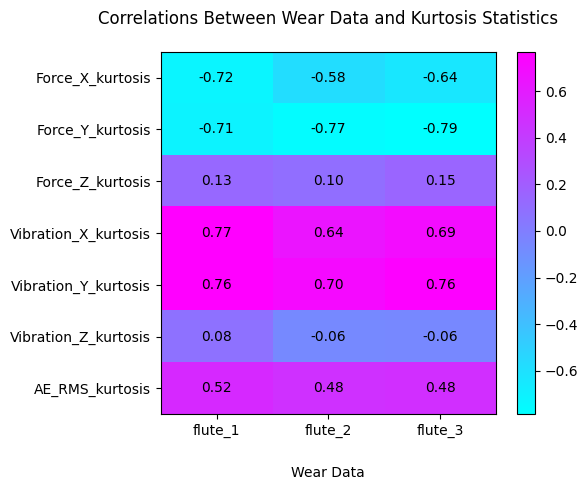

In [30]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Kurtosis Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(kurtosis_correlation_matrix, cmap='cool', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(kurtosis_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(kurtosis_columns)), kurtosis_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

The negative kurtosis values for Force_X and Force_Y indicate a controlled and stable cutting process with fewer extreme variations in force measurements. The positive kurtosis values for the vibration metrics indicate that there may be significant peaks in the data, suggesting that certain cutting conditions or operational practices may lead to higher vibration levels. The positive kurtosis in AE_RMS suggests that while the average emissions are stable, there are moments of significant activity that may correlate with tool wear or performance issues.

In [31]:
zero_cross_columns = [
    'Force_X_zero_crossings', 
    'Force_Y_zero_crossings', 
    'Force_Z_zero_crossings', 
    'Vibration_X_zero_crossings', 
    'Vibration_Y_zero_crossings', 
    'Vibration_Z_zero_crossings', 
    'AE_RMS_zero_crossings'
]

zero_cross_stats = c6_stats[zero_cross_columns]
combined_data_zero_cross = pd.concat([zero_cross_stats.reset_index(drop=True), c6_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_zero_cross = combined_data_zero_cross.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
zero_cross_correlation_matrix = corr_matrix_zero_cross.loc[zero_cross_columns, wear_columns]



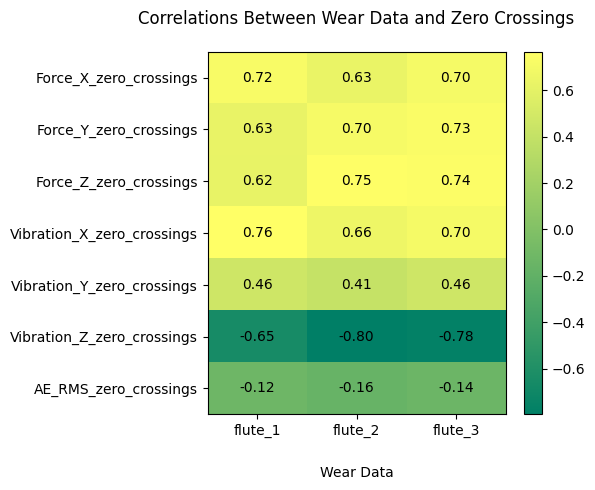

In [32]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Zero Crossings',  pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(zero_cross_correlation_matrix, cmap='summer', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(zero_cross_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(zero_cross_columns)), zero_cross_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

The analysis of zero crossings suggests that the cutting process is dynamic and responsive, particularly in the force metrics. The stability in the Z direction's vibrations and AE_RMS signals points to consistent operational conditions. 

In [33]:
energy_columns = [
    'Force_X_energy', 
    'Force_Y_energy', 
    'Force_Z_energy', 
    'Vibration_X_energy', 
    'Vibration_Y_energy', 
    'Vibration_Z_energy', 
    'AE_RMS_energy'
]

energy_stats = c6_stats[energy_columns]
combined_data_energy = pd.concat([energy_stats.reset_index(drop=True), c6_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_energy= combined_data_energy.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
energy_correlation_matrix = corr_matrix_energy.loc[energy_columns, wear_columns]

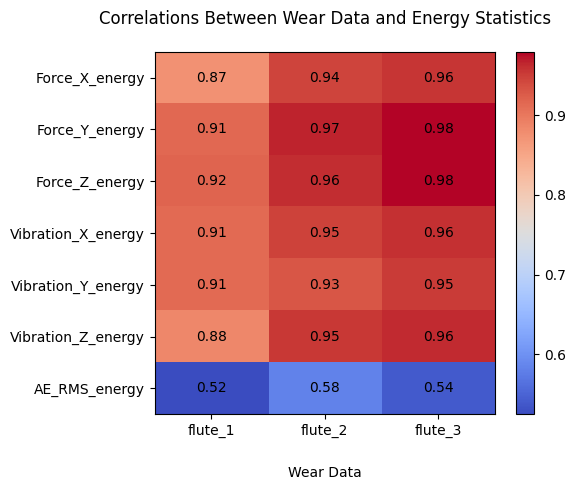

In [34]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Energy Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(energy_correlation_matrix, cmap='coolwarm', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(energy_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(energy_columns)), energy_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

The analysis of energy metrics suggests a robust and energetically intensive cutting operation across all axes for the c6 dataset. The strong force and vibration energies indicate effective material engagement, while the relatively lower AE_RMS energy suggests that acoustic emissions may not be the primary focus in evaluating performance.

## Conclusion

First, statistical calculations are made on each file of the dataset. The results of those are saved to a separate file, which then is used for the correlation analysis.
The calculated statisitcs:
- minimum
- maximum
- mean
- standard deviation
- skewness
- kurtosis
- energy
- zero crossings

The cluster matrix and accompanying data table reveal patterns of uneven wear among the flutes in the c6 dataset. Unlike the c1 dataset, flute 1 exhibits weaker overall correlations, suggesting a less uniform performance. While the strongest correlations remain between force and vibration metrics, the hierarchy within the signals is less distinct.

All three force metrics (X, Y, and Z) show robust positive correlations, particularly in their maximum and mean values. Notably, Force_Z_max exhibits the highest correlation across all flutes, indicating consistent peak forces during cutting operations.

Similar strong positive correlations are observed among vibration metrics, with Vibration_Z_max also standing out. This emphasizes that vibration behavior is closely linked to the applied forces during cutting.

The AE_RMS_max values present moderate correlations with both force and vibration metrics, suggesting that while acoustic emissions can provide valuable insights into the cutting process, they should be interpreted in conjunction with force data.